# 降为可视化
- 数据经过降维后可以画图可视化

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [3]:
iris = load_iris()
y = iris.target
X = iris.data
#作为数组，X是几维？
X.shape#(150, 4)
#作为数据表或特征矩阵，X是几维？
import pandas as pd
pd.DataFrame(X).head()


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#调用PCA
pca = PCA(n_components=2)           #实例化
pca = pca.fit(X)                    #拟合模型
X_dr = pca.transform(X)             #获取新矩阵
 
X_dr
#也可以fit_transform一步到位
#X_dr = PCA(2).fit_transform(X)


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

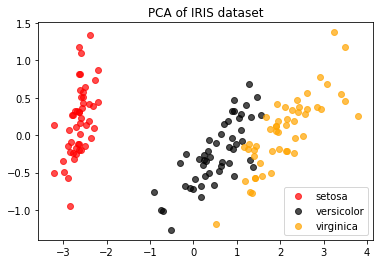

In [5]:
#要将三种鸢尾花的数据分布显示在二维平面坐标系中，对应的两个坐标（两个特征向量）应该是三种鸢尾花降维后的x1和x2，怎样才能取出三种鸢尾花下不同的x1和x2呢？
 
X_dr[y == 0, 0] #这里是布尔索引，看出来了么？
 
#要展示三中分类的分布，需要对三种鸢尾花分别绘图
#可以写成三行代码，也可以写成for循环
"""
plt.figure()
plt.scatter(X_dr[y==0, 0], X_dr[y==0, 1], c="red", label=iris.target_names[0])
plt.scatter(X_dr[y==1, 0], X_dr[y==1, 1], c="black", label=iris.target_names[1])
plt.scatter(X_dr[y==2, 0], X_dr[y==2, 1], c="orange", label=iris.target_names[2])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()
"""
 
colors = ['red', 'black', 'orange']
iris.target_names
 
plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_dr[y == i, 0]
                ,X_dr[y == i, 1]
                ,alpha=.7#指画出的图像的透明度
                ,c=colors[i]
                ,label=iris.target_names[i]
               )
plt.legend()#图例
plt.title('PCA of IRIS dataset')
plt.show()


- 探索降为后的数据

In [6]:
#属性explained_variance_，查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小）
pca.explained_variance_#查看方差是否从大到小排列，第一个最大，依次减小   array([4.22824171, 0.24267075])
 
#属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
#又叫做可解释方差贡献率
pca.explained_variance_ratio_#array([0.92461872, 0.05306648])
#大部分信息都被有效地集中在了第一个特征上
 
pca.explained_variance_ratio_.sum()#0.977685206318795

0.977685206318795

- 选择最好的n_components：累积可解释方差贡献率曲线

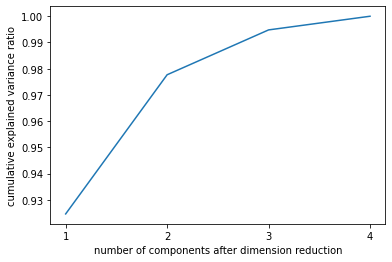

In [7]:
import numpy as np
pca_line = PCA().fit(X)
# pca_line.explained_variance_ratio_#array([0.92461872, 0.05306648, 0.01710261, 0.00521218])
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4]) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

- 最大似然估计自选超参数

In [8]:
pca_mle = PCA(n_components="mle")#mle缺点计算量大
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)
 
X_mle#3列的数组
#可以发现，mle为我们自动选择了3个特征
 
pca_mle.explained_variance_ratio_.sum()#0.9947878161267247
#得到了比设定2个特征时更高的信息含量，对于鸢尾花这个很小的数据集来说，3个特征对应这么高的信息含量，并不
# 需要去纠结于只保留2个特征，毕竟三个特征也可以可视化


0.9947878161267247

- 按信息量占比选超参数

In [10]:
pca_f = PCA(n_components=0.97,svd_solver="full")#svd_solver="full"不能省略
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)
X_f 
pca_f.explained_variance_ratio_#array([0.92461872, 0.05306648])

array([0.92461872, 0.05306648])

In [11]:
#X.shape()#(m,n)
PCA(2).fit(X).components_.shape#(2, 4)

PCA(2).fit(X).components_#V(k,n)
# array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
#        [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

## 人脸识别中属性components_的运用。

In [12]:
from sklearn.datasets import fetch_lfw_people#7个人的1000多张人脸图片组成的一组人脸数据
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


In [13]:
faces = fetch_lfw_people(min_faces_per_person=60)#实例化   min_faces_per_person=60：每个人取出60张脸图
faces#一个字典形式的数据

faces.images.shape#（1277,62,47）  1277是矩阵中图像的个数，62是每个图像的特征矩阵的行，47是每个图像的特征矩阵的列
#怎样理解这个数据的维度？
faces.data.shape#（1277,2914）   行是样本，列是样本相关的所有特征：2914 = 62 * 47
#换成特征矩阵之后，这个矩阵是什么样？
X = faces.data

KeyboardInterrupt: 

In [ ]:
#数据本身是图像，和数据本身只是数字，使用的可视化方法不同
 
#创建画布和子图对象
fig, axes = plt.subplots(4,5#4行5列个图
                        ,figsize=(8,4)#figsize指的是图的尺寸
                        ,subplot_kw = {"xticks":[],"yticks":[]} #不要显示坐标轴
                        )
fig#指的是画布
 
axes
#不难发现，axes中的一个对象对应fig中的一个空格
#我们希望，在每一个子图对象中填充图像（共24张图），因此我们需要写一个在子图对象中遍历的循环
axes.shape#（4,5）
 
#二维结构，可以有两种循环方式，一种是使用索引，循环一次同时生成一列上的四个图
#另一种是把数据拉成一维，循环一次只生成一个图
#在这里，究竟使用哪一种循环方式，是要看我们要画的图的信息，储存在一个怎样的结构里
#我们使用 子图对象.imshow 来将图像填充到空白画布上
#而imshow要求的数据格式必须是一个(m,n)格式的矩阵，即每个数据都是一张单独的图
#因此我们需要遍历的是faces.images，其结构是(1277, 62, 47)
#要从一个数据集中取出24个图，明显是一次性的循环切片[i,:,:]来得便利
#因此我们要把axes的结构拉成一维来循环

# [*axes.flat]#2维
axes.flat#降低一个维度
# [*axes.flat] #1维

enumerate(axes.flat)
 
#填充图像
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:] 
              ,cmap="gray" #选择色彩的模式
            )
 
# cmap参数取值选择各种颜色：https://matplotlib.org/tutorials/colors/colormaps.html

- 运行太慢了，看pdf